In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('vehicles.csv')

In [3]:
print("Num Features: ", len(cars.columns))
print("Features: ", cars.columns)
print("Num Samples: ", cars.shape[0])

Num Features:  26
Features:  Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
Num Samples:  458213


In [4]:
numMissing = cars.isna().sum().sum()
numTotal = cars.shape[0] * cars.shape[1]
pcmissing = float(numMissing/numTotal)*100.0
print("Percent missing: ", pcmissing, "%")



Percent missing:  11.444484417643189 %


Text(0.5, 0, '% missing')

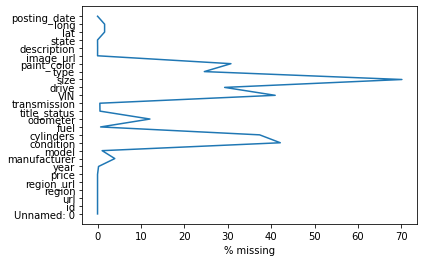

In [5]:
df = cars.copy()
for c in df.select_dtypes(exclude='number'):
    df[c] = df[c].astype('category').cat.codes
    
byFeature = pd.DataFrame(columns=cars.columns)
for feature in cars.columns:
    byFeature.at[0, feature] = float(cars[feature].isna().sum()/len(cars[feature]))*100.0

plt.plot(np.array(byFeature).reshape(-1, 1), df.columns)
plt.xlabel("% missing")

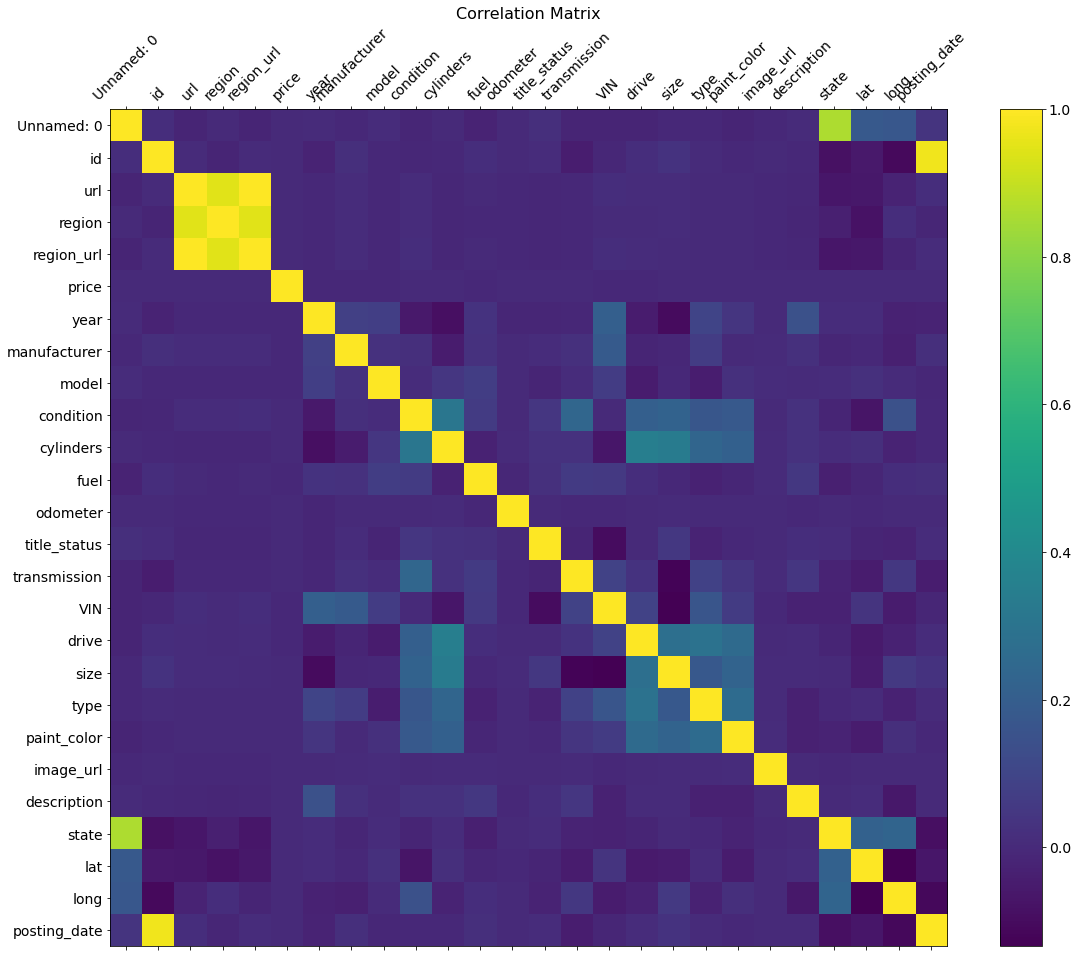

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Text(0.5, 0, 'Correlation with price')

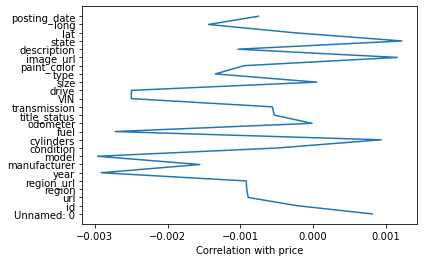

In [7]:
nopr = df.corr()['price'].drop(['price'])
plt.plot(nopr, nopr.index)
plt.xlabel("Correlation with price")

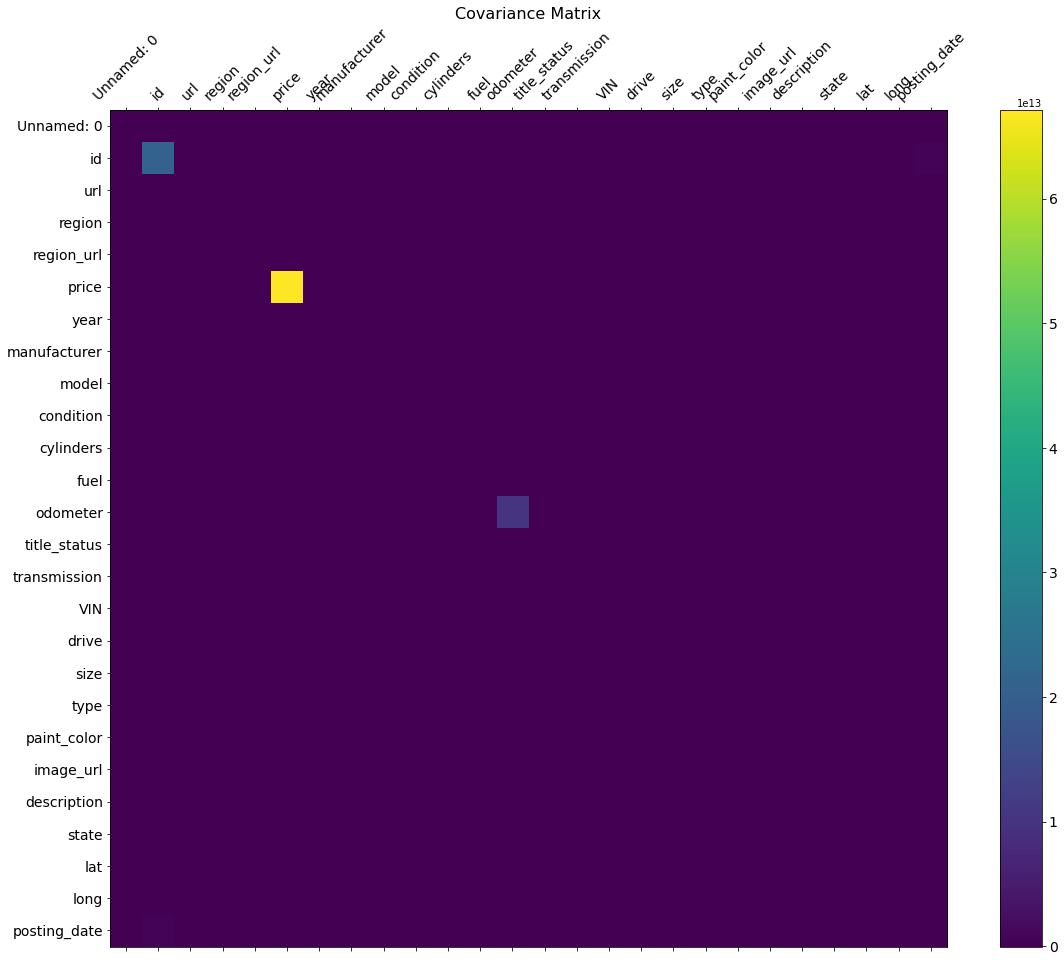

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.cov(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Covariance Matrix', fontsize=16);

Text(0.5, 0, 'Covariance with price')

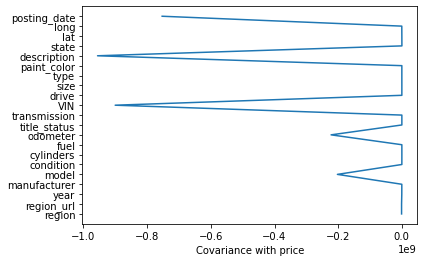

In [9]:
nopr = df.cov()['price'].drop(['price'])
nopr = nopr.drop(['id','Unnamed: 0', 'image_url', 'url'])
plt.plot(nopr, nopr.index)
plt.xlabel("Covariance with price")

In [10]:
df['size']

0        -1
1        -1
2        -1
3         1
4         1
         ..
458208    2
458209    2
458210    2
458211    2
458212   -1
Name: size, Length: 458213, dtype: int8

(394689, 21)
PC1 	:  price
PC2 	:  odometer
PC3 	:  posting_date
PC4 	:  description
PC5 	:  VIN
PC6 	:  model
PC7 	:  region
PC8 	:  long
PC9 	:  state
PC10 	:  manufacturer
PC11 	:  year
PC12 	:  lat
PC13 	:  paint_color
PC14 	:  type
PC15 	:  cylinders
PC16 	:  condition
PC17 	:  size
PC18 	:  drive
PC19 	:  title_status
PC20 	:  fuel
PC21 	:  transmission


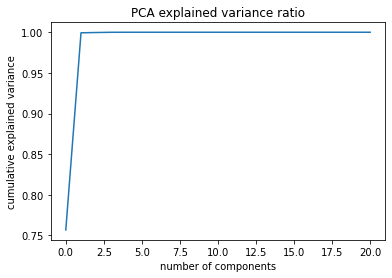

In [37]:
from sklearn.decomposition import PCA 

df2 = df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url'],axis=1)

df2 = df2.dropna()
print(df2.shape)
pcs = 10

pca = PCA()
pca.fit(df2)

n = 1
for pc in pca.components_:    
    #plt.title("PC"+str(n))
    #plt.plot(pc, df2.columns)
    #plt.show()
    print('PC'+str(n),'\t: ', df2.columns[np.argmax(np.abs(pc))])
    n+=1
    
pca = PCA()
pca.fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA explained variance ratio")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()